In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Метод дихотомии



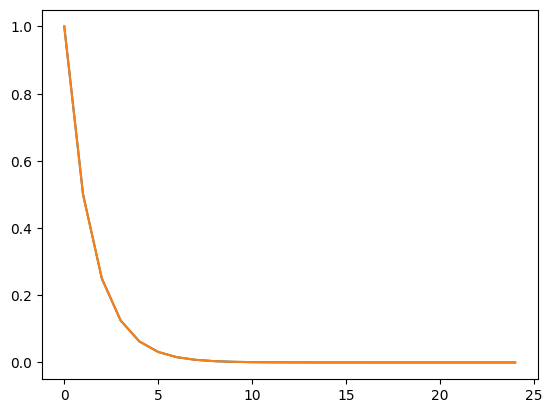

     eps                   x*                 f(x*)  iterations  calculations
0  0.001  -0.6647619628906251  -0.41619747455948364          11            22
1  1e-05   -0.664554266838074  -0.41619761066444383          17            34
2  1e-07  -0.6645561125745851  -0.41619761067543526          24            48

Метод золотого сечения



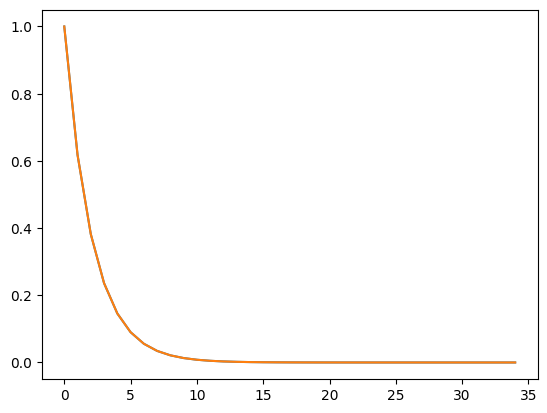

     eps                   x*                 f(x*)  iterations  calculations
0  0.001  -0.6645317538411195  -0.41619760876983714          15            17
1  1e-05  -0.6645570044525009   -0.4161976106729055          24            26
2  1e-07  -0.6645561102633026  -0.41619761067543415          34            36


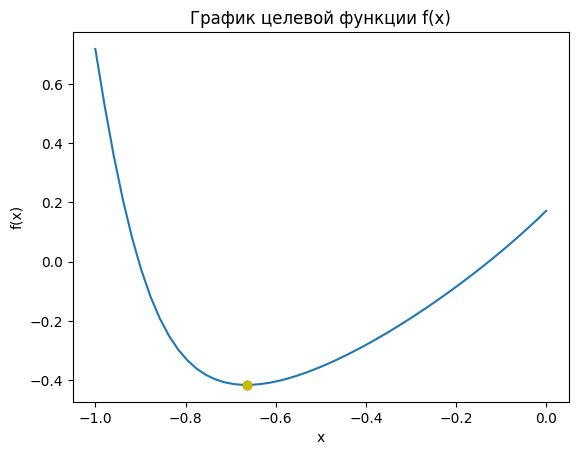

In [2]:
# Вариант 4

def F(x):
  R1 = np.tanh(pow(x,2)*5+x*3-2)
  R2 = np.exp((pow(x,3)+6*pow(x,2)+12*x+8)/(2*pow(x,2)+8*x+7))
  return R1 + R2 - 2.0

#метод дихотомии
print("\nМетод дихотомии\n")
df = pd.DataFrame(columns=["eps", "x*", "f(x*)", "iterations", "calculations"])
for eps in [pow(10, -3), pow(10, -5), pow(10, -7)]:
  a = -1.0
  b = 0.0
  iterations = 0
  calculations = 0
  l_real = [b-a]
  l_theor = [b-a]
  delta = eps / 10
  while abs(b - a) > eps:
   # plt.plot([a,b],[2*(iterations+1),2*(iterations+1)], 'b')
    x1 = (a + b)/2 - delta
    x2 = (a + b)/2 + delta
    if F(x1) > F(x2):
      a = x1
    else:
      b = x2
    l_real.append(b-a)
    l_theor.append((l_theor[0]-2*delta)/2**(iterations+1)+2*delta)
    iterations += 1
    calculations += 2
  x_min1 = (a + b) / 2
  df.loc[len(df)] = [str(eps), str(x_min1), str(F(x_min1)), int(iterations), int(calculations)]
 # plt.show()
iter = list(range(0, iterations+1))
plt.plot(iter, l_real) # реальный график длин
plt.plot(iter, l_theor) # теоретический график длин
plt.show()
print(df) #таблица данных

#метод золотого сечения
print("\nМетод золотого сечения\n")
df2 = pd.DataFrame(columns=["eps", "x*", "f(x*)", "iterations", "calculations"])
t = (1+math.sqrt(5))/2
for eps in [pow(10, -3), pow(10, -5), pow(10, -7)]:
  a = -1.0
  b = 0.0
  x1 = a + (b-a) * (2/(3+np.sqrt(5)))
  x2 = a + (b-a) * (2/(1+np.sqrt(5)))
  l_real = [b-a]
  l_theor = [b-a]
  iterations = 0
  calculations = 0
  F1 = F(x1)
  F2 = F(x2)
  calculations += 2
  while b - a > eps:
    if F1 < F2:
      b = x2
      x2 = x1
      F2 = F1
      x1 = a + b - x2
      F1 = F(x1)
    else:
      a = x1
      x1 = x2
      F1 = F2
      x2 = a + b - x1
      F2 = F(x2)

    iterations += 1
    calculations += 1
    l_real.append(b-a)
    l_theor.append(l_theor[0]/pow(t, iterations))
 # plt.show()
  x_min2 = (a + b) / 2
  df2.loc[len(df2)] = [str(eps), str(x_min2), str(F(x_min2)), int(iterations), int(calculations)]
iter = list(range(0, iterations+1))

plt.plot(iter, l_real) # реальный график длинw
plt.plot(iter, l_theor) # теоретический график длин
plt.show()
print(df2) # вывод таблицы данных

# график целевой функции с отмеченными точками
x = np.linspace(-1, 0)
plt.plot(x, F(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_min1, F(x_min1), 'ro')
plt.plot(x_min2, F(x_min2), 'yo')
plt.title('График целевой функции f(x)')
plt.show()


Метод дихотомии



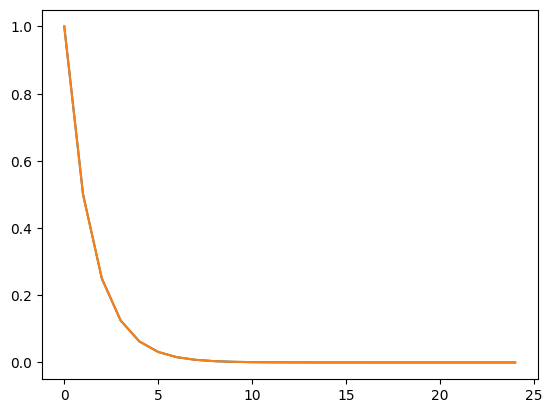


     eps                   x*                f(x*)  iterations  calculations
0  0.001  -0.5026850097656249   0.4016234674328749          11            22
1  1e-05  -0.5026664680557251   0.4016234679432711          17            34
2  1e-07  -0.5026664435330208  0.40162346794327375          24            48



Метод золотого сечения



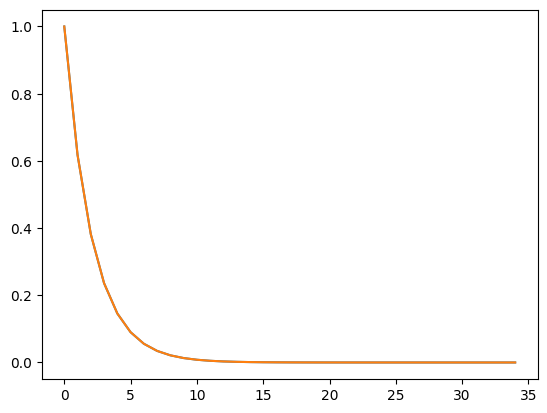


     eps                   x*                f(x*)  iterations  calculations
0  0.001  -0.5026525161614028    0.401623467658065          15            17
1  1e-05  -0.5026681218996245  0.40162346793897763          24            26
2  1e-07    -0.50266640697133   0.4016234679432751          34            36





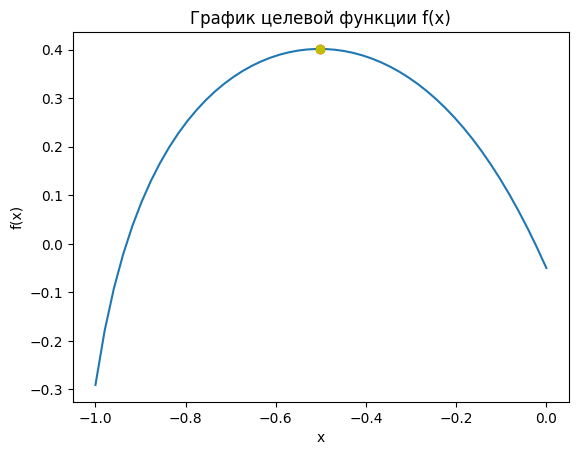

In [3]:
# Вариант 18

def F(x):
  R1 = np.sin((-pow(x,4)-4*pow(x,3)-8*pow(x,2)-7*x+1)/np.sqrt(11))
  R2 = np.sqrt(10)
  R2 = np.log((4*pow(x,5)-4*R2*pow(x,4)+8*pow(x,3)+5*pow(x,2)-5*R2*x+9)/(pow(x,2)-R2*x+2))/np.log(10)
  return R1 + R2 - 1.0

#метод дихотомии
print("\nМетод дихотомии\n")
df = pd.DataFrame(columns=["eps", "x*", "f(x*)", "iterations", "calculations"])
for eps in [pow(10, -3), pow(10, -5), pow(10, -7)]:
  a = -1.0
  b = 0.0
  iterations = 0
  calculations = 0
  l_real = [b-a]
  l_theor = [b-a]
  delta = eps / 10
  while abs(b - a) > eps:
   # plt.plot([a,b],[2*(iterations+1),2*(iterations+1)], 'b')
    x1 = (a + b)/2 - delta
    x2 = (a + b)/2 + delta
    if F(x1) < F(x2):
      a = x1
    else:
      b = x2
    l_real.append(b-a)
    l_theor.append((l_theor[0]-2*delta)/2**(iterations+1)+2*delta)
    iterations += 1
    calculations += 2
  x_max1 = (a + b) / 2
  df.loc[len(df)] = [str(eps), str(x_max1), str(F(x_max1)), int(iterations), int(calculations)]
 # plt.show()
iter = list(range(0, iterations+1))
plt.plot(iter, l_real) # реальный график длин
plt.plot(iter, l_theor) # теоретический график длин
plt.show()
print()
print(df) #таблица данных
print('\n')

#метод золотого сечения
print("\nМетод золотого сечения\n")
df2 = pd.DataFrame(columns=["eps", "x*", "f(x*)", "iterations", "calculations"])
t = (1+math.sqrt(5))/2
for eps in [pow(10, -3), pow(10, -5), pow(10, -7)]:
  a = -1.0
  b = 0.0
  x1 = a + (b-a) * (2/(3+np.sqrt(5)))
  x2 = a + (b-a) * (2/(1+np.sqrt(5)))
  l_real = [b-a]
  l_theor = [b-a]
  iterations = 0
  calculations = 0
  F1 = F(x1)
  F2 = F(x2)
  calculations += 2
  while b - a > eps:
    #plt.plot([a,b],[2*(iterations+1),2*(iterations+1)], 'b')
    if F1 > F2:
      b = x2
      x2 = x1
      F2 = F1
      x1 = a + b - x2
      F1 = F(x1)
    else:
      a = x1
      x1 = x2
      F1 = F2
      x2 = a + b - x1
      F2 = F(x2)
    iterations += 1
    calculations += 1
    l_real.append(b-a)
    l_theor.append(l_theor[0]/pow(t, iterations))
 # plt.show()
  x_max2 = (a + b) / 2
  df2.loc[len(df2)] = [str(eps), str(x_max2), str(F(x_max2)), int(iterations), int(calculations)]
iter = list(range(0, iterations+1))

plt.plot(iter, l_real) # реальный график длин
plt.plot(iter, l_theor) # теоретический график длин
plt.show()
print()
print(df2) # вывод таблицы данных
print('\n\n')
# график целевой функции с отмеченными точками
x = np.linspace(-1, 0)
plt.plot(x, F(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_max1, F(x_max1), 'ro')
plt.plot(x_max2, F(x_max2), 'yo')
plt.title('График целевой функции f(x)')
plt.show()